In [1]:
import os

os.chdir('../')
os.getcwd()

'/home/bitwalk/MyProjects/stock-explorer'

# データセットの準備

- 対象銘柄は 8035（東京エレクトロン）の１分足のデータとする。

In [2]:
import glob

ticker = '8035'
glob_path = 'cache/%s*.pkl' % ticker
files = sorted(glob.glob(glob_path))
files, len(files)

(['cache/8035.T_2024-02-26_2024-02-27_1m.pkl',
  'cache/8035.T_2024-02-27_2024-02-28_1m.pkl',
  'cache/8035.T_2024-02-28_2024-02-29_1m.pkl',
  'cache/8035.T_2024-02-29_2024-03-01_1m.pkl',
  'cache/8035.T_2024-03-01_2024-03-02_1m.pkl',
  'cache/8035.T_2024-03-04_2024-03-05_1m.pkl',
  'cache/8035.T_2024-03-05_2024-03-06_1m.pkl',
  'cache/8035.T_2024-03-06_2024-03-07_1m.pkl',
  'cache/8035.T_2024-03-07_2024-03-08_1m.pkl',
  'cache/8035.T_2024-03-08_2024-03-09_1m.pkl',
  'cache/8035.T_2024-03-11_2024-03-12_1m.pkl',
  'cache/8035.T_2024-03-12_2024-03-13_1m.pkl',
  'cache/8035.T_2024-03-13_2024-03-14_1m.pkl',
  'cache/8035.T_2024-03-14_2024-03-15_1m.pkl',
  'cache/8035.T_2024-03-15_2024-03-16_1m.pkl',
  'cache/8035.T_2024-03-18_2024-03-19_1m.pkl',
  'cache/8035.T_2024-03-19_2024-03-20_1m.pkl',
  'cache/8035.T_2024-03-21_2024-03-22_1m.pkl',
  'cache/8035.T_2024-03-22_2024-03-23_1m.pkl',
  'cache/8035.T_2024-03-25_2024-03-26_1m.pkl',
  'cache/8035.T_2024-03-26_2024-03-27_1m.pkl',
  'cache/8035

- 値がついた時点を０分とし、最初の３０分の終値と次の３０分を示す t カラムでデータフレームを構成、y は t に対応する終値。

In [3]:
import pandas as pd

list_df_next = list()
for pkl in files:
    file = os.path.join(pkl)    
    df = pd.read_pickle(file)
    
    df_close = pd.DataFrame({'Close': list(df['Close'])}, index=list(range(len(df.index))))
    df_first = df_close.iloc[0:30].T.reset_index(drop=True)
    list_df0 = list()
    for t in range(30, 60):
        df0 = df_first.copy()
        df0['t'] = t
        df0['y'] = df_close['Close'].iloc[t]
        list_df0.append(df0)

    df_next = pd.concat(list_df0).reset_index(drop=True)
    list_df_next.append(df_next)

df_dataset = pd.concat(list_df_next).reset_index(drop=True)
df_dataset

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,t,y
0,36490.0,36580.0,36540.0,36530.0,36470.0,36410.0,36530.0,36580.0,36300.0,36350.0,...,36330.0,36350.0,36280.0,36300.0,36290.0,36310.0,36340.0,36350.0,30,36380.0
1,36490.0,36580.0,36540.0,36530.0,36470.0,36410.0,36530.0,36580.0,36300.0,36350.0,...,36330.0,36350.0,36280.0,36300.0,36290.0,36310.0,36340.0,36350.0,31,36380.0
2,36490.0,36580.0,36540.0,36530.0,36470.0,36410.0,36530.0,36580.0,36300.0,36350.0,...,36330.0,36350.0,36280.0,36300.0,36290.0,36310.0,36340.0,36350.0,32,36370.0
3,36490.0,36580.0,36540.0,36530.0,36470.0,36410.0,36530.0,36580.0,36300.0,36350.0,...,36330.0,36350.0,36280.0,36300.0,36290.0,36310.0,36340.0,36350.0,33,36340.0
4,36490.0,36580.0,36540.0,36530.0,36470.0,36410.0,36530.0,36580.0,36300.0,36350.0,...,36330.0,36350.0,36280.0,36300.0,36290.0,36310.0,36340.0,36350.0,34,36340.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1405,34390.0,34470.0,34470.0,34430.0,34390.0,34380.0,34360.0,34440.0,34470.0,34440.0,...,34760.0,34680.0,34770.0,34810.0,34770.0,34810.0,34860.0,34800.0,55,35030.0
1406,34390.0,34470.0,34470.0,34430.0,34390.0,34380.0,34360.0,34440.0,34470.0,34440.0,...,34760.0,34680.0,34770.0,34810.0,34770.0,34810.0,34860.0,34800.0,56,35020.0
1407,34390.0,34470.0,34470.0,34430.0,34390.0,34380.0,34360.0,34440.0,34470.0,34440.0,...,34760.0,34680.0,34770.0,34810.0,34770.0,34810.0,34860.0,34800.0,57,35010.0
1408,34390.0,34470.0,34470.0,34430.0,34390.0,34380.0,34360.0,34440.0,34470.0,34440.0,...,34760.0,34680.0,34770.0,34810.0,34770.0,34810.0,34860.0,34800.0,58,35010.0


# 機械学習

- lightGBM を使用する

In [6]:
X = df_dataset.loc[:, df_dataset.columns!='y']
y = df_dataset.loc[:, 'y']

In [63]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
X_train = X.iloc[0:(1410 - 30)]
X_test = X.iloc[(1410 - 30):]
y_train = y.iloc[0:(1410 - 30)]
y_test = y.iloc[(1410 - 30):]

In [82]:
import lightgbm as lgb

model = lgb.LGBMRegressor(max_depth=1000, num_leaves=50, random_state=0)

eval_set = [(X_test, y_test)]
callbacks = []
callbacks.append(lgb.early_stopping(stopping_rounds=10))
callbacks.append(lgb.log_evaluation())
model.fit(X_train, y_train, eval_set=eval_set, callbacks=callbacks)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000276 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1379
[LightGBM] [Info] Number of data points in the train set: 1380, number of used features: 31
[LightGBM] [Info] Start training from score 37450.804348
[1]	valid_0's l2: 5.01621e+06
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's l2: 3.81083e+06
[3]	valid_0's l2: 2.86798e+06
[4]	valid_0's l2: 2.13445e+06
[5]	valid_0's l2: 1.55774e+06
[6]	valid_0's l2: 1.1243e+06
[7]	valid_0's l2: 788954
[8]	valid_0's l2: 543448
[9]	valid_0's l2: 358551
[10]	valid_0's l2: 229054
[11]	valid_0's l2: 136417
[12]	valid_0's l2: 77104.4
[13]	valid_0's l2: 38189.3
[14]	valid_0's l2: 20584.1
[15]	valid_0's l2: 14921
[16]	valid_0's l2: 20473
[17]	valid_0's l2: 32946.3
[18]	valid_0's l2: 50350.9
[19]	valid_0's l2: 72244.9
[

LGBMRegressor(max_depth=1000, num_leaves=50, random_state=0)

In [85]:
y_pred = model.predict(X_test)
df_pred = pd.DataFrame({'Y': list(y_test), 'Y_pred': list(y_pred)}, index=range(30, 60))
df_pred

,Y,Y_pred
30,34840.0,34914.846451
31,34790.0,34914.846451
32,34790.0,34914.846451
33,34780.0,34914.846451
34,34740.0,34914.846451
35,34770.0,34914.846451
36,34770.0,34914.846451
37,34810.0,34910.833446
38,34830.0,34910.833446
39,34810.0,34910.833446


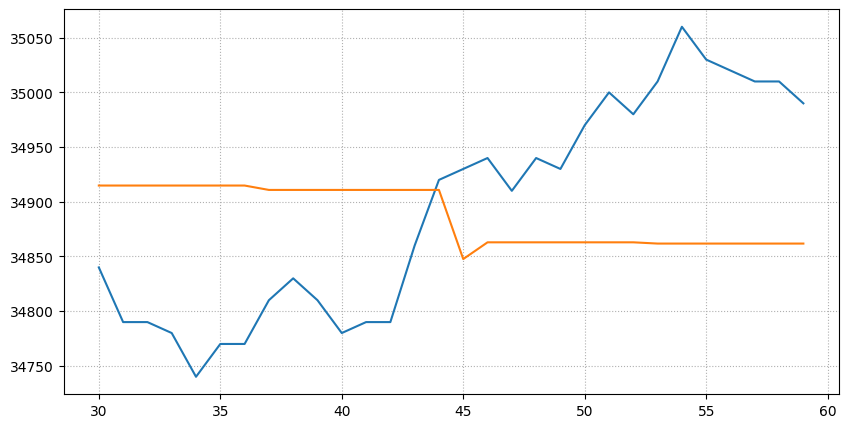

In [86]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10, 5)
fig, ax = plt.subplots()

ax.plot(
    df_pred
)
plt.grid(linestyle=':')
#plt.subplots_adjust(left=0.06, right=0.995, bottom=0.2, top=0.93)
plt.show()